In [1]:
import numpy as np
import pandas as pd
import glob
import os

from scipy.io import loadmat
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# pal = {'wingHz': '#231f20', 'rightHalHz':  '#33ade3' , 'leftHalHz': '#ed1c24'}
pal = {'intact': '#231f20', 'oneRidge': '#231f20', 'bothRidge':'#231f20', 'bothHal':'#231f20'}

boxprops = {'edgecolor': None, 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
# Note that you can change the order of hue variables here.
kwargs = {'palette': pal, 'hue_order': ['intact', 'oneRidge', 'bothRidge', 'bothHal']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0, 'size': 6, 'alpha': 0.7},
                        **kwargs)

In [4]:
direc = r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/delFreq_Figure4/delFreqWithoutLength/delFreqWithoutNorm.mat"

In [5]:
data = loadmat(direc)

In [6]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Feb 21 14:14:33 2014',
 '__version__': '1.0',
 '__globals__': [],
 'bothHaltereAblated': array([[array([[105.2631579 ,   1.        ],
        [111.1111111 ,   0.76269945],
        [142.8571429 ,   0.61769684],
        [166.6666667 ,   0.46432117],
        [200.        ,   0.38906248]]),
         array([[117.6470588 ,   1.        ],
        [125.        ,   0.79533641],
        [142.8571429 ,   0.70859711],
        [166.6666667 ,   0.59416696],
        [181.8181818 ,   0.53296655],
        [200.        ,   0.44989442]]),
         array([[111.1111111 ,   1.        ],
        [129.16666665,   0.79689103],
        [142.8571429 ,   0.65411109],
        [160.25641025,   0.54308654],
        [181.8181818 ,   0.45626714],
        [200.        ,   0.41207984]]),
         array([[117.6470588 ,   1.        ],
        [125.        ,   0.76363594],
        [153.8461538 ,   0.63415625],
        [166.6666667 ,   0.52538917],
   

In [13]:
intact = data['delFreqIntactAnimals'][:,0]
oneRidge = data['delFreqOneRidgeCut'][:,0]
bothRidge = data['delFreqBothSideRidgeCut'][:,0]
bothHal = data['delFreqBothHalAbl'][:,0]

In [15]:
df = pd.DataFrame(data = None, columns = ['intact', 'oneRidge', 'bothRidge', 'bothHal'])

In [30]:
df.loc[:,'intact'] = intact
df['oneRidge'] = pd.Series(oneRidge)
df['bothRidge'] = pd.Series(bothRidge)
df['bothHal'] = pd.Series(bothHal)

In [31]:
df

,intact,oneRidge,bothRidge,bothHal
0,126.9841,38.961039,36.199095,94.736842
1,75.0000,66.889632,25.708502,82.352941
2,200.0000,64.171123,37.593985,88.888889
3,97.2222,64.171123,28.070175,82.352941
4,86.5801,61.403509,42.857143,100.000000
5,86.5801,28.846154,45.659019,88.888889
6,82.3529,NaN,NaN,NaN
7,75.7576,NaN,NaN,NaN


In [32]:
seaborn_long = pd.melt(df, 
                       var_name= 'treatment',
                       value_name= 'Frequency')

In [37]:
seaborn_long

,treatment,Frequency
0,intact,126.984100
1,intact,75.000000
2,intact,200.000000
3,intact,97.222200
4,intact,86.580100
5,intact,86.580100
6,intact,82.352900
7,intact,75.757600
8,oneRidge,38.961039
9,oneRidge,66.889632


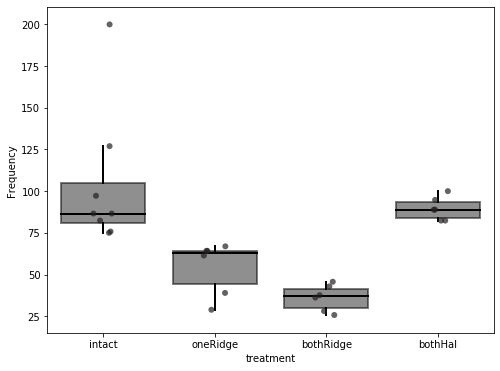

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(ax = ax, x = 'treatment', y = 'Frequency', data = seaborn_long,
           order = ['intact', 'oneRidge', 'bothRidge', 'bothHal'],
           fliersize=0, **boxplot_kwargs)
sns.stripplot(ax = ax, x = 'treatment', y = 'Frequency', data = seaborn_long,
#               order = ['intact', 'oneRidge', 'bothRidge', 'bothHal'],
              dodge=True, 
              edgecolor = None,
              **stripplot_kwargs)
plt.savefig('./dataFolder/Fig4.pdf')